In [3]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/home/kirill/Projects/nir')
sys.path.append('/home/kirilman/Projects/nir/nir/')
import myutils
import sequence_generator as generator
import numpy as np
import matplotlib.pylab as plt
from pomegranate import *
from myutils import frequency_occurrence

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


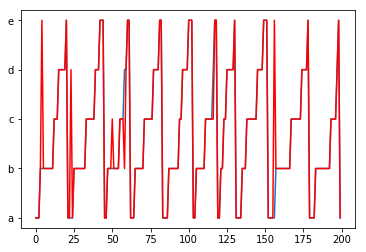

In [2]:
N = 200
sequence = generator.Sequence(N,['a','b','c','d','e'])
sequence.test_discrete()
seq = sequence.sequence
#seq = np.array(sequence.to_int()).reshape(-1,1)
#print(seq.shape)
plt.plot(seq)
anomal = sequence.anormal(0.05)
plt.plot(anomal,'r-')

In [3]:
model = MarkovChain.from_samples([seq])
model.distributions

[{
     "class" :"Distribution",
     "dtype" :"str",
     "name" :"DiscreteDistribution",
     "parameters" :[
         {
             "a" :1.0,
             "b" :0.0,
             "c" :0.0,
             "e" :0.0,
             "d" :0.0
         }
     ],
     "frozen" :false
 }, {
     "class" : "Distribution",
     "name" : "ConditionalProbabilityTable",
     "table" : [
         [
             "a",
             "a",
             "0.696969696969697"
         ],
         [
             "a",
             "b",
             "0.30303030303030304"
         ],
         [
             "a",
             "c",
             "0.0"
         ],
         [
             "a",
             "e",
             "0.0"
         ],
         [
             "a",
             "d",
             "0.0"
         ],
         [
             "b",
             "a",
             "0.0"
         ],
         [
             "b",
             "b",
             "0.855072463768116"
         ],
         [
             "b",
     

In [4]:
model.log_probability(seq)

-106.0180993967892

In [5]:
model.log_probability(anomal)

-inf

In [6]:
np.linspace(0,0.3,8)

array([0.        , 0.04285714, 0.08571429, 0.12857143, 0.17142857,
       0.21428571, 0.25714286, 0.3       ])

In [7]:
for p in np.linspace(0,0.3,0.05):
    print(p)

/home/kirilman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35
0.4
0.45000000000000007
0.5
0.55


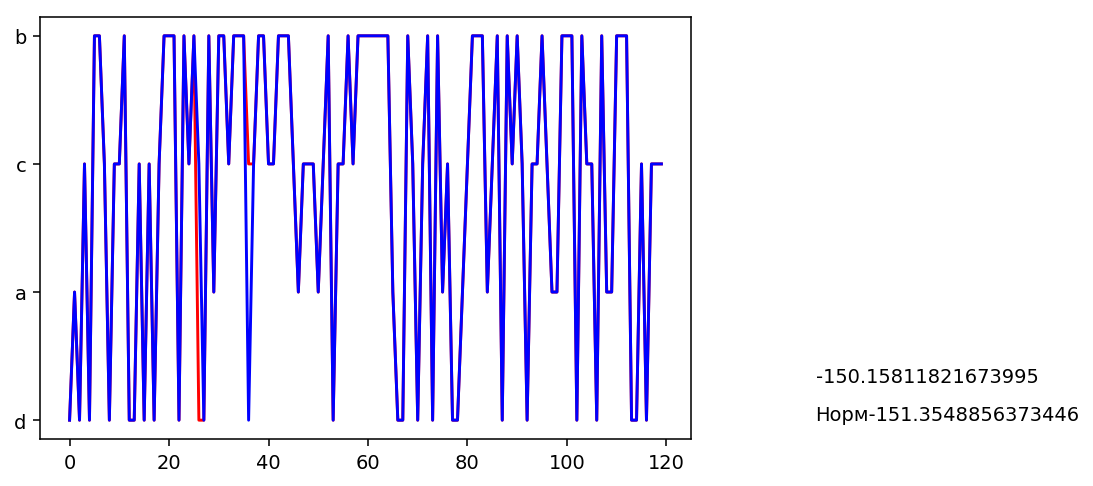

In [8]:
lvl = [0.1 + i*0.05 for i in range(10)]

normal_score = []
anormal_score = []
for p in lvl:
    print(p)
    for i in range(10):
        N = 120
        sequence = generator.Sequence(N,['a','b','c','d'],type = 'random',p=[0.1,0.5,0.8])
#         sequence.test_discrete()
        seq = sequence.sequence
        #seq = np.array(sequence.to_int()).reshape(-1,1)
        #print(seq.shape)
        s  =  sequence.sequence.copy()
        s[26] = 'c'; s[36] = 'd'
        anomal = s
        
#         plt.plot(seq,'b')
#         plt.plot(anomal,'r-')
        model = MarkovChain.from_samples([seq]);
        normal_score+=[model.log_probability(seq)]
        anormal_score+=[model.log_probability(anomal)]
#         print(model.log_probability(seq),' ',model.log_probability(anomal))
        if i == 0 and p ==lvl[3]:
            plt.figure(dpi = 140)
            plt.plot(seq,'r')
            plt.plot(anomal,'b')
            plt.text(150,0,'Норм'+str(normal_score[0]))
            plt.text(150,0.3, anormal_score[0])
            
normal_score = np.array(normal_score);
anormal_score = np.array(anormal_score)

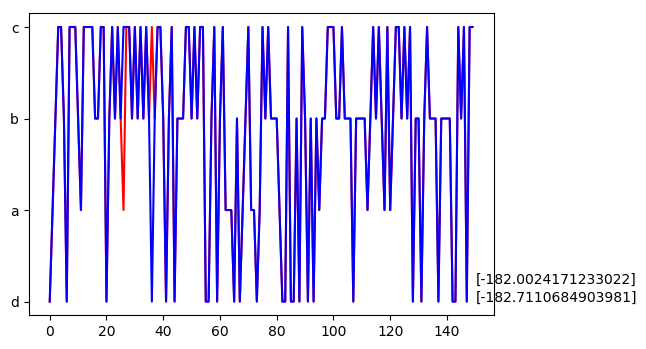

In [9]:
normal_score = []
anormal_score = []

for i in range(100):
    N = 150
    sequence = generator.Sequence(N,['a','b','c','d'],type = 'random',p=[0.1,0.5,0.8])
#         sequence.test_discrete()
    seq = sequence.sequence
    #seq = np.array(sequence.to_int()).reshape(-1,1)
    #print(seq.shape)
    s  =  sequence.sequence.copy()
    s[26] = 'c'; s[36] = 'd'; s[62] = 'd'; s[62] = 'a'
    anomal = s

#         plt.plot(seq,'b')
#         plt.plot(anomal,'r-')
    model = MarkovChain.from_samples([seq]);
    normal_score+=[model.log_probability(seq)]
    anormal_score+=[model.log_probability(anomal)]
#         print(model.log_probability(seq),' ',model.log_probability(anomal))
    if i == 0:
        plt.figure(dpi = 100)
        plt.plot(seq,'r')
        plt.plot(anomal,'b')
        plt.text(150,0,normal_score)
        plt.text(150,0.2, anormal_score)
        
normal_score = np.array(normal_score);
anormal_score = np.array(anormal_score)

In [10]:
np.sum([normal_score > anormal_score])

90

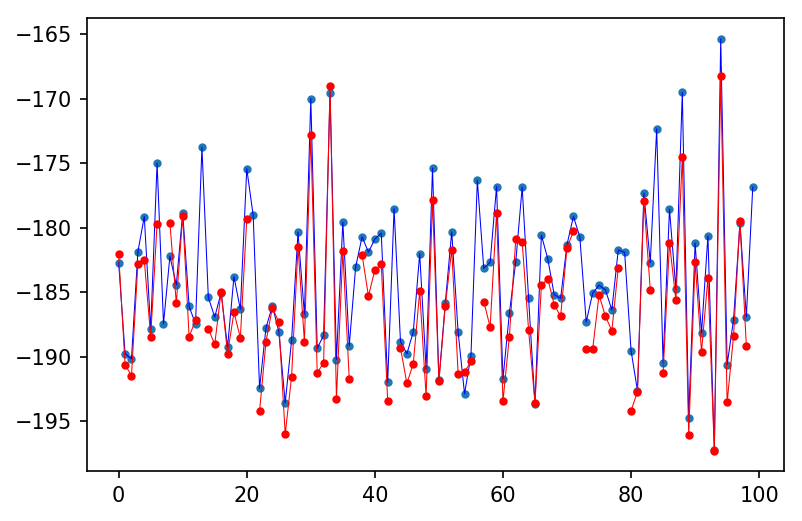

In [11]:
plt.figure(dpi = 150)
plt.plot(normal_score,'.',linewidth = 1,)
plt.plot(normal_score,'b',linewidth = 0.5)

plt.plot(anormal_score,'r.',linewidth = 0.5)
plt.plot(anormal_score,'r',linewidth = 0.5)

In [12]:
q = []
[3]*2
q.append([3]*2)
q.append(['a']*3)
q.insert(1,[1]*4)
q = [1,2,3,4,5]

In [13]:
q[-1]

5

In [14]:
q

[1, 2, 3, 4, 5]

In [15]:
##Сигнал у которого четкие переходы
def experiment_1(N=60,alpha = ['a','b','c','d','e'],p = 0.00):
    params = {'a': {'len': [1, 1], 'depend_on': False},
              'b': {'len': [1, 1], 'depend_on': False},
              'c': {'len': [0, 1], 'depend_on': False},
              'd': {'len': [0, 1], 'depend_on': 'c' },
              'e': {'len': [1, 3], 'depend_on': 'b'}}
    sequence = generator.Sequence(N,alpha)
    sequence.test_discrete(params)
    normal_seq = sequence.sequence
    anormal_seq = sequence.anormal(p)
    anormal_seq[5] = 'b'
    print(normal_seq)
    #model
    model = MarkovChain.from_samples([normal_seq]);
    #model = HiddenMarkovModel.from_samples(DiscreteDistribution,n_components = 4,X=[normal_seq]);

    normal_score = []
    anormal_score = []
    
    normal_score+=[model.log_probability(normal_seq)]
    anormal_score+=[model.log_probability(anormal_seq)]
    print("Нормальный {}, Аномальный {}".format(normal_score[0],anormal_score[0]))
    print(normal_score)
    print(anormal_score)
    plt.plot(anormal_seq,'r')
    
    plt.plot(normal_seq)
    plt.plot(normal_seq,'b.')
    plt.savefig('Дискретный с невозможным переходом.png',dpi = 150)
    #print(model.to_json())
    
    with open('experiment1.txt','w') as file:
        table = myutils.table_from_MarkovChain(model)
        for t in table:
            file.write(str(t)+'\n')
    return model

['a', 'b', 'c', 'e', 'e', 'a', 'b', 'c', 'e', 'e', 'e', 'a', 'b', 'c', 'e', 'a', 'b', 'a', 'b', 'c', 'e', 'a', 'b', 'c', 'e', 'e', 'a', 'b', 'c', 'e', 'e', 'a', 'b', 'a', 'b', 'd', 'e', 'e', 'e', 'a', 'b', 'c', 'e', 'a', 'b', 'c', 'e', 'a', 'b', 'c', 'e', 'a', 'b', 'c', 'e', 'a', 'b', 'a', 'b', 'a']
Нормальный -24.078197240074818, Аномальный -inf
[-24.078197240074818]
[-inf]


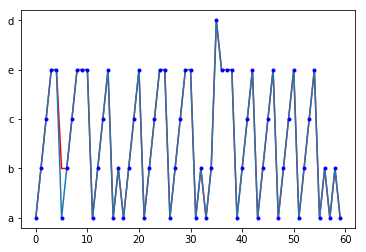

In [16]:
model = experiment_1();

In [17]:
##Сигнал у которого четкие переходы
def experiment_2(N=100,alpha = ['a','b','c','d','e'],p = 0.1):
#     params = {'a': {'len': [1, 1], 'depend_on': False},
#               'b': {'len': [1, 1], 'depend_on': False},
#               'c': {'len': [0, 1], 'depend_on': False},
#               'd': {'len': [0, 1], 'depend_on': 'c' },
#               'e': {'len': [1, 3], 'depend_on': 'b'}}
    sequence = generator.Sequence(N,alpha,type='random',p=[0.05,0.1,0.4,0.8])
    normal_seq = sequence.sequence
    anormal_seq = sequence.anormal(p)
#     anormal_seq[5] = 'b'
    print(normal_seq)
    #model
    model = MarkovChain.from_samples([normal_seq]);
    #model = HiddenMarkovModel.from_samples(DiscreteDistribution,n_components = 4,X=[normal_seq]);

    normal_score = []
    anormal_score = []
    
    normal_score+=[model.log_probability(normal_seq)]
    print(model.distributions[1])
    anormal_score+=[model.log_probability(anormal_seq)]
    print("Нормальный {}, Аномальный {}".format(normal_score[0],anormal_score[0]))
    print(normal_score)
    print(anormal_score)
    plt.plot(anormal_seq,'r')
    
    plt.plot(normal_seq,'b')
    plt.plot(normal_seq,'b.')
    plt.savefig('Дискретный с невозможным переходом.png',dpi = 150)
    #print(model.to_json())
    
    with open('experiment1.txt','w') as file:
        table = myutils.table_from_MarkovChain(model)
        for t in table:
            file.write(str(t)+'\n')
#     print(model.distributions[1])
    return model

['d', 'b', 'd', 'd', 'c', 'c', 'd', 'd', 'd', 'd', 'e', 'd', 'c', 'd', 'd', 'c', 'e', 'c', 'd', 'd', 'c', 'e', 'c', 'd', 'a', 'd', 'c', 'd', 'd', 'e', 'd', 'c', 'd', 'c', 'd', 'd', 'e', 'd', 'c', 'e', 'd', 'd', 'e', 'c', 'c', 'c', 'd', 'e', 'e', 'b', 'e', 'b', 'd', 'c', 'd', 'e', 'd', 'c', 'e', 'd', 'b', 'b', 'c', 'd', 'e', 'c', 'a', 'c', 'c', 'c', 'd', 'c', 'd', 'c', 'c', 'c', 'd', 'd', 'c', 'd', 'd', 'b', 'c', 'b', 'd', 'e', 'e', 'd', 'd', 'd', 'c', 'c', 'c', 'c', 'c', 'd', 'd', 'd', 'd', 'e']
a	a	0.0
a	b	0.0
a	c	0.5
a	e	0.0
a	d	0.5
b	a	0.0
b	b	0.14285714285714285
b	c	0.2857142857142857
b	e	0.14285714285714285
b	d	0.42857142857142855
c	a	0.03125
c	b	0.03125
c	c	0.34374999999999994
c	e	0.12500000000000003
c	d	0.46875
e	a	0.0
e	b	0.13333333333333333
e	c	0.26666666666666666
e	e	0.13333333333333333
e	d	0.4666666666666667
d	a	0.023255813953488372
d	b	0.06976744186046512
d	c	0.32558139534883723
d	e	0.20930232558139536
d	d	0.37209302325581395
Нормальный -124.7204451539486, Аномальный -123.6

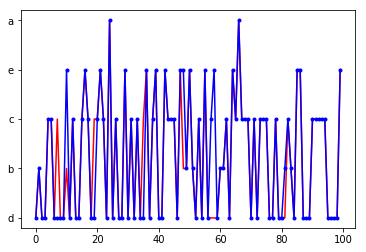

In [18]:
experiment_2()

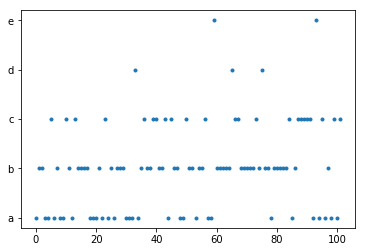

In [19]:
sequence = generator.Sequence(102,['a','b','c','d','e'],type='random',p=[0.05,0.1,0.4,0.8])
s = sequence.sequence
plt.yticks(range(7),['a','b','c','d','e'])
plt.plot(s,'.')

In [20]:
def rename_state(x):
    a = 's'+x
    return a
def experiment_3(s,n_components):
    #s = generator.Signal(5000,4,[10,10,10,12],[0.5,2,4,2],[50,100])
    seq = s.sequence
    print(seq[:10])
    v = int(len(seq)*0.8)
    x_train, x_test = seq[0:v], seq[v:]
    path_train = s.path[0:v]
    path_source = s.path[v:]
    
    labels = list(map(rename_state,list(map(str,path_train))))
    print(len(labels))
    model = HiddenMarkovModel.from_samples(NormalDistribution, n_components = n_components,X = [x_train],
                                           labels=[labels],algorithm='labeled' )
    p = model.viterbi(x_test)
    path_test = []
    for i in p[1]:
        path_test +=[i[0]]
    path_test = path_test[1:]
    
    
    print('Длина пути для теста: soure={}, test={}'.format(len(path_source), len(path_test)))
    
    path_source = np.array(path_source)
    path_test = np.array(path_test)
    path_train = np.array(path_train)
    fig,ax = plt.subplots(3,1,dpi=140)
    ax[0].plot(x_train)
    ax[0].plot(path_train*3,'g',lw=0.9)
    
    p = model.viterbi(x_train)
    path_s = []
    
    for i in p[1]:
        path_s +=[i[0]]
    path_s = path_s[1:]
    path_s = np.array(path_s)
    ax[0].plot(path_s*3,'r')
    
    ax[2].hist(x_train,bins = int(np.log(len(x_train))+30));
    
    ax[1].plot(x_test)
    ax[1].plot(path_source*3,'g')
    ax[1].plot(path_test*3,'r--')
    plt.tight_layout()
    print(np.mean(seq))
    print(model)
    
    #--------
    signal = np.array(seq)
    return model

In [21]:
#numpy.random.seed(0)

In [22]:
signal = generator.Signal(5000,3,[10,14,10,12],[0.5,2,4,2],[50,100])
print(signal.sequence[:5])

[10.278653429288775, 9.885215437110984, 10.334343731074476, 9.877916169415933, 9.5560788894647]


[10.278653429288775, 9.885215437110984, 10.334343731074476, 9.877916169415933, 9.5560788894647, 9.466681086607245, 10.008793743650717, 11.036144585266506, 10.024634886558811, 10.040114334647255]
4000
Длина пути для теста: soure=1000, test=1000
11.320225598548253
None:{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "name" : "NormalDistribution",
        "parameters" : [
            10.011720299356064,
            0.6007889803024501
        ],
        "frozen" : false
    },
    "name" : "s0",
    "weight" : 1.0
}{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "name" : "NormalDistribution",
        "parameters" : [
            13.926748553672168,
            2.103522612881421
        ],
        "frozen" : false
    },
    "name" : "s1",
    "weight" : 1.0
}{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "name" : "NormalDistribution",
        "parameters" : [
     

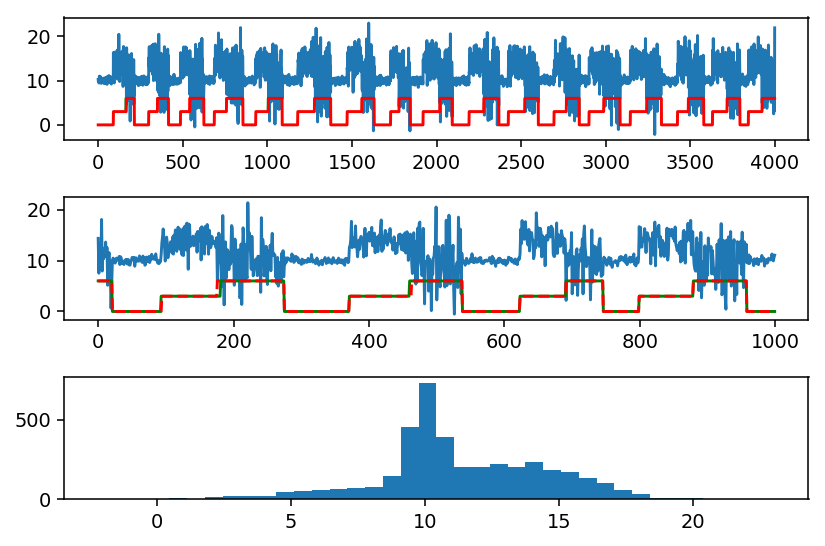

In [23]:
model = experiment_3(signal,3)

In [24]:
s = generator.Signal(1000,3,[10,14,10,12],[0.5,2,4,2],[50,100])
signal=s.sequence
y_test = s.path

In [25]:
log, path = model.viterbi(signal)
path =[ state.name for i, state in model.viterbi(signal)[1]]

In [26]:
x = model.viterbi(signal)

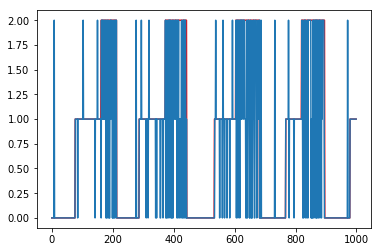

In [27]:
y_pred = []
for x in signal:
    y_pred.append(model.viterbi([x])[1][1][0])
    #y_test.append(model.viterbi([x])[1][1]['name'])
#plt.plot(y_pred)
plt.plot(y_test,'r')
plt.plot(y_pred)

In [28]:
a = model.viterbi(signal[0:10])[1]
for i in a:
    print(i[0])
s = [x[0] for x in model.viterbi(signal[0:10])[1]][1:]
s

3
0
0
0
0
0
0
0
0
0
0


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [29]:
y_pred = []
S = 50 

for i in range(len(signal)):
    #print(signal[i:i+step])
#     print(model.viterbi(signal[i:i+step])[1])
    a = [s[0] for s in model.viterbi(signal[i:i+step])[1] ][1:]
    
#     y_pred.append(model.viterbi([signal[i:i+step]])[1][1][0])
    y_pred = y_pred + a
    #y_test.append(model.viterbi([x])[1][1]['name'])
#plt.plot(y_pred)
plt.plot(y_test,'r')
plt.plot(y_pred,'b')
#y_pred

NameError: name 'step' is not defined

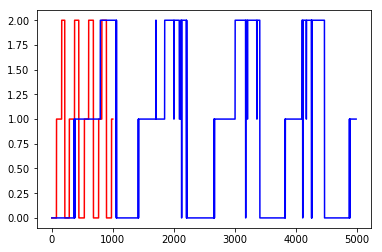

In [30]:
y_pred = []
step = 5
for i in range(len(signal)):
    #print(signal[i:i+step])
#     print(model.viterbi(signal[i:i+step])[1])
    a = [s[0] for s in model.viterbi(signal[i:i+step])[1] ][1:]
    
#     y_pred.append(model.viterbi([signal[i:i+step]])[1][1][0])
    y_pred = y_pred + a
    #y_test.append(model.viterbi([x])[1][1]['name'])
#plt.plot(y_pred)
plt.plot(y_test,'r')
plt.plot(y_pred,'b')
#y_pred

In [31]:
y_pred = predict(model,signal,windows_size = 60,step = 10)

TypeError: predict() got an unexpected keyword argument 'windows_size'

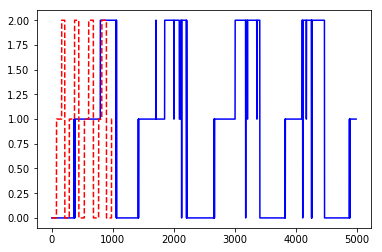

In [32]:
plt.plot(y_pred,'b')
plt.plot(y_test,'r--')

/home/kirilman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


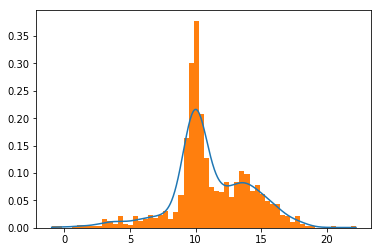

In [33]:
from scipy import stats

space = np.linspace(min(signal),max(signal),1000)
ker  = stats.gaussian_kde(signal)
plt.plot(space,ker(space))
#plt.plot(np.mean(signal),)
plt.hist(signal,60,normed=True);

In [34]:
a = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,15,15,241]
#a = [0]*28


def predict(model,y_test,windows_size = 4, step = 3):
    y_pred = []
    print(len(y_test))
    print('Количество окон ',len(y_test)/step)
    for i in range(int(len(y_test)/step)):
        t = y_test[i*step:windows_size+i*step]
#         print(t)
        path = model.viterbi(t)[1]
        x = [y[0] for y in path][1:]
        if i == 0:
            y_pred = y_pred + x
        else:
            y_pred = y_pred + x[windows_size-step:]
#         print(x)
#         print('y_pred',y_pred)
#         print(t[windows_size-step:])
#     print(x)
    return y_pred

### Эксперимент с дискретным сигналом ( продолжительное состояние в каждом сигнале).

In [35]:
a = True
b = True
(a==0) or (b==0)

False

In [36]:
def get_slice(s):
    m = np.random.choice(range(len(s)))
    # m = 0
    print(m)
    c = s[m]
    start, stop = 0,0
    i = 1 
    flag_1 = True
    flag_2 = True
    while((flag_1==True) or (flag_2 == True)):
        if flag_1 == True:
            if m-i-1 == 0:
                start = m-i+1
                flag_1 = False
            else:
                if s[m - i]!=c:
                    start = m-i+1
                    flag_1 = False
        if flag_2 == True:
            if m + i - 1 == len(s) - 1:
                stop = m + i
                flag_2 = False
            else:
                if s[m+i]!=c:
                    stop = m + i
                    flag_2 = False
        i+=1
        print('i ',i)
    return start, stop, c   

In [37]:
##Сигнал у которого четкие переходы
def experiment_discret(N=100,alpha = ['a','b','c','d','e'],p = 0.05):
#     params = {'a': {'len': [1, 1], 'depend_on': False},
#               'b': {'len': [1, 1], 'depend_on': False},
#               'c': {'len': [0, 1], 'depend_on': False},
#               'd': {'len': [0, 1], 'depend_on': 'c' },
#               'e': {'len': [1, 3], 'depend_on': 'b'}}
    print(np.random.rand(2))
    sequence = generator.Sequence(N,alpha,type='test_discret',p=[0.05,0.1,0.4,0.8])
    normal_seq = sequence.sequence.copy()
    #Аномальная последовательность
#     anormal_seq = sequence.anormal(p)
    start, stop, simbol = get_slice(normal_seq)

    anormal_seq = normal_seq.copy()
    
    anormal_seq[start:stop] = ['b']*(stop - start)
    print('start',start,'stop',stop)
#     n_count = 5
#     anormal_seq[20:20+n_count] = ['b']*n_count
    print(normal_seq)
    
    print('Длина нормальной ',len(normal_seq),', аномальной ', len(anormal_seq))
    model = MarkovChain.from_samples([normal_seq]);
    model = HiddenMarkovModel(name = 'kir').from_samples(DiscreteDistribution,n_components = 5,X=[normal_seq]);

    normal_score = []
    anormal_score = []
    normal_score+=[model.log_probability(normal_seq)]
#     print(model.distributions[1])
    anormal_score+=[model.log_probability(anormal_seq)]
    print("Нормальный {}, Аномальный {}".format(normal_score[0],anormal_score[0]))
    
    #Построение графика
    plt.plot(anormal_seq,'r')    
    plt.plot(normal_seq,'b')
    plt.plot(normal_seq,'b.')
    plt.grid()
    plt.savefig('Дискретный с невозможным переходом.png',dpi = 150)
    #print(model.to_json())
    
#     with open('experiment1.txt','w') as file:
#         table = myutils.table_from_MarkovChain(model)
#         for t in table:
#             file.write(str(t)+'\n')
#     print(model.distributions[1])
    return model

[0.01425152 0.34210388]
859
i  2
start 859 stop 860
['a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'c', 'c', 'c', 'c', 'd', 'e', 'e', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'c', 'c', 'c', 'd', 'd', 'd', 'e', 'e', 'e', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'd', 'd', 'd', 'd', 'e', 'e', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'c', 'c', 'c', 'c', 'd', 'd', 'e', 'e', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'd', 'd', 'd', 'd', 'e', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'c', 'c', 'c', 'c', 'c', 'c', 'd', 'e', 'e', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'c', 'c', 'c', 'c', 'c', 'c', 'd', 'd', 'd', 'd', 'e', 'e', 'e', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'd', 'd', 'e', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'c', 'c', 'd', 'd', 'e', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'c', 'c', 'c', 'c', 'c', 'c', 'c

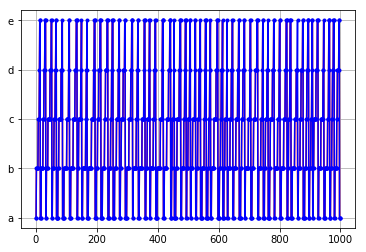

In [38]:
model = experiment_discret(1000)

In [344]:
model

{
    "class" : "HiddenMarkovModel",
    "name" : "None",
    "start" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-start",
        "weight" : 1.0
    },
    "end" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-end",
        "weight" : 1.0
    },
    "states" : [
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "dtype" : "numpy.str_",
                "name" : "DiscreteDistribution",
                "parameters" : [
                    {
                        "a" : 1.0,
                        "b" : 1.436385312895077e-72,
                        "c" : 0.0,
                        "d" : 0.0,
                        "e" : 1.8377832660630276e-28
                    }
                ],
                "frozen" : false
            },
            "name" : "s0",
            "weight" : 1.0
        },
        {
            "class" : "Sta

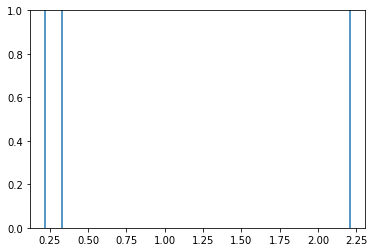

In [345]:
xcoords = [0.22058956, 0.33088437, 2.20589566]
for xc in xcoords:
    plt.axvline(x=xc)

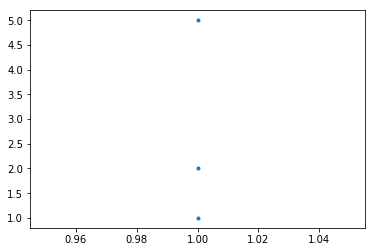

In [346]:
plt.plot([1,1,1],[1,2,5],'.')

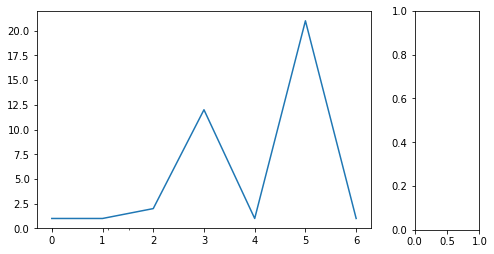

In [347]:
fig, ax = plt.subplots(1)
ax.plot([1,1,2,12,1,21,1])
# ax[0,1].tight_layout()
ax2 = fig.add_axes([1, 0.12, 0.15, 0.76])
ax.set_xticks([0,1.1,1.52],['0','0','1','b','a'])

In [348]:
params = {'a': {'len': [2, 5], 'depend_on': False},
                      'b': {'len': [0, 10], 'depend_on': False},
                      'c': {'len': [2, 7], 'depend_on': False},
                      'd': {'len': [1, 5], 'depend_on': 'c' },
                      'e': {'len': [1, 2], 'depend_on': True},
                      'f': {'len': [1, 2], 'depend_on': True}}

['a', 'a', 'b', 'b', 'b', 'b', 'b', 'c', 'c', 'e', 'e', 'f', 'f', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'c', 'c', 'c', 'e', 'e', 'f', 'f', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b']
['a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'c', 'c', 'e', 'e', 'f', 'f', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'c', 'c', 'c', 'e', 'f', 'f', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c']
['a', 'a', 'a', 'a', 'a', 'c', 'c', 'c', 'c', 'e', 'e', 'f', 'a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'e', 'e', 'f', 'f', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b']


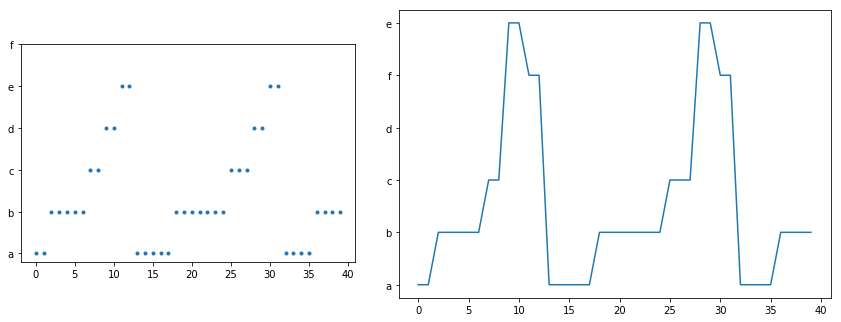

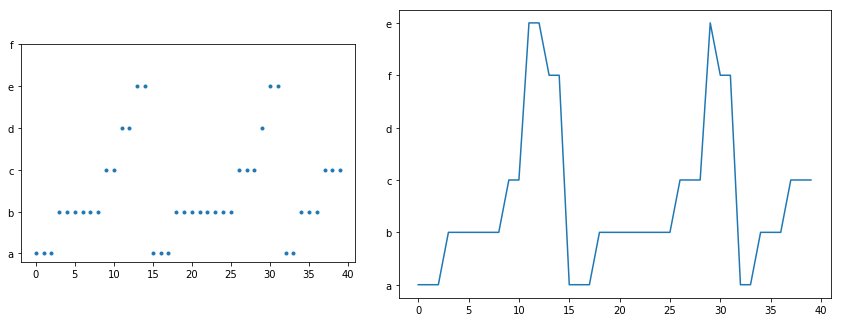

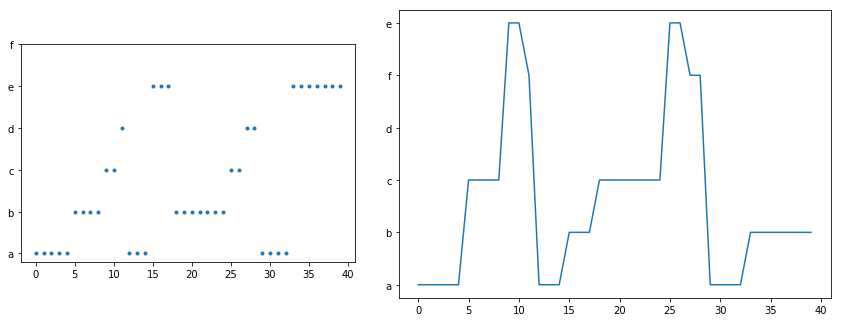

In [349]:
for i in range(3):
    s = generator.Sequence(n=40,alphabet=['a','b','c','d','e','f'],type='test_discret',params = params)
    s.path
    s = s.sequence
    print(s)
    fig = plt.figure()
    plt.plot(s,'.')
    plt.yticks(range(6),('a','b','c','d','e','f'))
    ax = fig.add_axes([1,0,1,1])
    ax.plot(['a','b','c','d','f'],'w')
    ax.plot(s)

In [350]:
plt.savefig('s/График последовательностей_'+str(22)+'.png')


<Figure size 432x288 with 0 Axes>

In [351]:
s = generator.Sequence(n=10,alphabet=['a','b','c','d','e','f'],type='test_discret',params = params)
s.path[:13]
seq = s.sequence
print(seq)

['a', 'a', 'a', 'a', 'a', 'c', 'c', 'c', 'c', 'e']


In [352]:
for a in stage.distribution.parameters[0].values():
    print(a, a)

NameError: name 'stage' is not defined

In [353]:
a = ' g ga = 4  fafa 2 2 /n'
a

' g ga = 4  fafa 2 2 /n'

In [354]:
ans = ''
for k,v in state.distribution.parameters[0].items():
    temp = "'{}'={:.5G};  ".format(k,v)
    print(v)
#     temp = ' {:e}'.format(v)
    ans +=temp
ans +='\n'
ans

2.5386779293978068e-53
1.0
4.870117700317765e-64
0.0
0.0


"'a'=2.5387E-53;  'b'=1;  'c'=4.8701E-64;  'd'=0;  'e'=0;  \n"

In [426]:
def print_model_distribution(model):
    out = '{0:>10}  {1:<15}\n'.format('Состояние', 'Вероятность испускания')
    states = []
    for state in model.states:
        out+='{:>10}: '.format(state.name)
        try:
            if len(state.distribution.parameters) > 1:
                print('Количество параметров распределения больше 1')
            print(state.distribution.parameters[0])
            
            for k,v in state.distribution.parameters[0].items():
                temp = "'{}' = {:4.2E};    ".format(k,v)
                out +=temp
            out+='\n'
            states += [state.name]
        except:
            out+='\n'
            
    sample, path = model.sample( 100000, path=True )
    n = model.state_count() - 2
    trans = np.zeros((n,n))
    for state, n_state in zip( path[1:-2], path[2:-1] ):
        state_name = int( state.name[1:] )-1            #!Нестандартное имя состояния
        n_state_name = int( n_state.name[1:] )-1
        trans[ state_name, n_state_name ] += 1
    trans = (trans.T / trans.sum( axis=1 )).T
     
    out_2 = '        '
    for s in states:
        out_2 += '{:6}'.format(s)  
    out_2+='\n'
    
    for i in range(n):
        for j in range(n):
            if j == 0:
                out_2+='{0:5} {1:4.2f}  '.format(states[i], trans[i,j])
            else:
                out_2+='{:4.2f}  '.format(trans[i,j])
        out_2+='\n'
            
    out+=out_2
    return  out

In [427]:
c = print_model_distribution(model)
file = open('test.txt','w')
file.write(c)
file.close()

{'a': 1.0, 'b': 1.436385312895077e-72, 'c': 0.0, 'd': 0.0, 'e': 1.8377832660630276e-28}
{'a': 0.0, 'b': 1.0, 'c': 1.6276650811193227e-47, 'd': 0.0, 'e': 0.0}
{'a': 1.5142189069136e-71, 'b': 0.0, 'c': 3.1209352845965357e-76, 'd': 0.5877862595419835, 'e': 0.41221374045801656}
{'a': 1.7901678277724134e-45, 'b': 1.0, 'c': 0.0, 'd': 0.0, 'e': 0.0}
{'a': 0.0, 'b': 1.0402295038896082e-81, 'c': 1.0, 'd': 1.5495988714276408e-48, 'e': 0.0}


In [421]:
c

" Состояние  Вероятность испускания\n        s0: 'a' = 1.00E+00;    'b' = 1.44E-72;    'c' = 0.00E+00;    'd' = 0.00E+00;    'e' = 1.84E-28;    \n        s1: 'a' = 0.00E+00;    'b' = 1.00E+00;    'c' = 1.63E-47;    'd' = 0.00E+00;    'e' = 0.00E+00;    \n        s2: 'a' = 1.51E-71;    'b' = 0.00E+00;    'c' = 3.12E-76;    'd' = 5.88E-01;    'e' = 4.12E-01;    \n        s3: 'a' = 1.79E-45;    'b' = 1.00E+00;    'c' = 0.00E+00;    'd' = 0.00E+00;    'e' = 0.00E+00;    \n        s4: 'a' = 0.00E+00;    'b' = 1.04E-81;    'c' = 1.00E+00;    'd' = 1.55E-48;    'e' = 0.00E+00;    \nNone-start: \n  None-end: \n        s0s1s2s3s4\ns0    0.66 0.00  0.00  0.34  0.00  \ns1    0.00 0.80  0.00  0.00  0.20  \ns2    0.35 0.00  0.65  0.00  0.00  \ns3    0.00 0.22  0.00  0.78  0.00  \ns4    0.00 0.00  0.27  0.00  0.73  \n"

In [358]:
state = model.states[0]
state

{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "dtype" : "numpy.str_",
        "name" : "DiscreteDistribution",
        "parameters" : [
            {
                "a" : 1.0,
                "b" : 1.436385312895077e-72,
                "c" : 0.0,
                "d" : 0.0,
                "e" : 1.8377832660630276e-28
            }
        ],
        "frozen" : false
    },
    "name" : "s0",
    "weight" : 1.0
}

In [359]:
state.distribution

{
    "class" :"Distribution",
    "dtype" :"numpy.str_",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "a" :1.0,
            "b" :1.436385312895077e-72,
            "c" :0.0,
            "d" :0.0,
            "e" :1.8377832660630276e-28
        }
    ],
    "frozen" :false
}

In [360]:
state.distribution.parameters

[{'a': 1.0,
  'b': 1.436385312895077e-72,
  'c': 0.0,
  'd': 0.0,
  'e': 1.8377832660630276e-28}]

In [361]:
model

{
    "class" : "HiddenMarkovModel",
    "name" : "None",
    "start" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-start",
        "weight" : 1.0
    },
    "end" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-end",
        "weight" : 1.0
    },
    "states" : [
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "dtype" : "numpy.str_",
                "name" : "DiscreteDistribution",
                "parameters" : [
                    {
                        "a" : 1.0,
                        "b" : 1.436385312895077e-72,
                        "c" : 0.0,
                        "d" : 0.0,
                        "e" : 1.8377832660630276e-28
                    }
                ],
                "frozen" : false
            },
            "name" : "s0",
            "weight" : 1.0
        },
        {
            "class" : "Sta

In [312]:
model.edges

In [323]:
import itertools as it

In [375]:
sample, path = model.sample( 100000, path=True )
n = model.state_count() - 2
trans = np.zeros((n,n))
for state, n_state in zip( path[1:-2], path[2:-1] ):
    state_name = int( state.name[1:] )-1
    n_state_name = int( n_state.name[1:] )-1
    trans[ state_name, n_state_name ] += 1
print(trans)
print(trans.sum(axis = 1))
print(trans.T)
trans = (trans.T / trans.sum( axis=1 )).T

[[10395.     0.     0.  5267.     0.]
 [    0. 21356.     0.     0.  5267.]
 [ 5267.     0.  9984.     0.     0.]
 [    0.  5267.     0. 17849.     0.]
 [    0.     0.  5267.     0. 14079.]]
[15662. 26623. 15251. 23116. 19346.]
[[10395.     0.  5267.     0.     0.]
 [    0. 21356.     0.  5267.     0.]
 [    0.     0.  9984.     0.  5267.]
 [ 5267.     0.     0. 17849.     0.]
 [    0.  5267.     0.     0. 14079.]]


In [378]:
trans[]

SyntaxError: invalid syntax (<ipython-input-378-aea7ea225904>, line 1)

In [369]:
trans

array([[0.66402184, 0.        , 0.        , 0.33597816, 0.        ],
       [0.        , 0.79756905, 0.        , 0.        , 0.20243095],
       [0.3372348 , 0.        , 0.6627652 , 0.        , 0.        ],
       [0.        , 0.22187573, 0.        , 0.77812427, 0.        ],
       [0.        , 0.        , 0.26787544, 0.        , 0.73212456]])

In [365]:
trans

array([[0.66180721, 0.        , 0.        , 0.33819279, 0.        ],
       [0.        , 0.80129076, 0.        , 0.        , 0.19870924],
       [0.35008642, 0.        , 0.64991358, 0.        , 0.        ],
       [0.        , 0.22673843, 0.        , 0.77326157, 0.        ],
       [0.        , 0.        , 0.26779902, 0.        , 0.73220098]])

In [337]:
a = [1,2,3]; b = [2,3,4]
for n,m in zip(a,b):
    print(n,m)

1 2
2 3
3 4


In [438]:
if type(model) == 'pomegranate.hmm.HiddenMarkovModel':
    print('s')
else:
    print('n')

n


In [445]:
isinstance(model,HiddenMarkovModel)

True

In [40]:
get_slice(s)

5
i  2
i  3
i  4
i  5
i  6


(2, 10, 0)

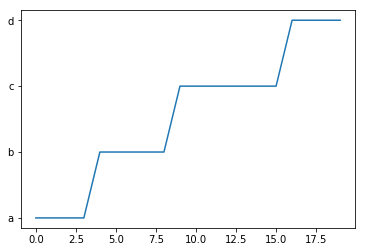

In [55]:
sequence = generator.Sequence(20,['a','b','c','d','e'],type='test_discret',p=[0.05,0.1,0.4,0.8])
sequence = sequence.sequence
plt.plot(sequence)

In [56]:
get_slice(sequence)

11
i  2
i  3
i  4
i  5
i  6


(9, 16, 'c')

In [72]:
params = {'a': {'len': [10, 40], 'depend_on': False},
          'b': {'len': [20, 40], 'depend_on': False}}

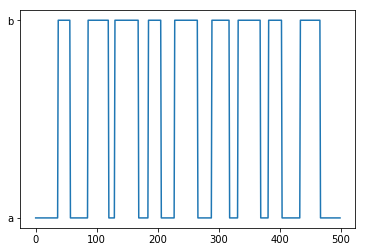

In [76]:
test = generator.Sequence(500,['a','b'], type = 'test_discret',params=params)
test = test.sequence
plt.plot(test)

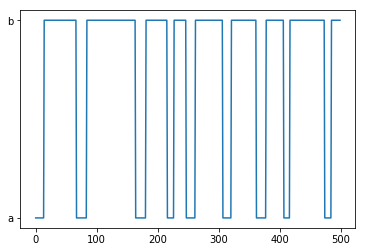

In [4]:
test = generator.Sequence(500,['a','b'], type = 'test_discret',
                          params={'a': {'len': [10, 20], 'depend_on': False},
                                  'b': {'len': [20, 80], 'depend_on': False}})
test = test.sequence
plt.plot(test)

In [6]:
test = generator.Sequence(500, ['a','b'], type = 'continue',
                          params={'a': {'len': [10, 20], 'depend_on': False},
                                  'b': {'len': [20, 80], 'depend_on': False}},
                          means= [0, 2] , varince = [0.4, 0.6])

TypeError: __init__() got an unexpected keyword argument 'means'